## Group Name : Data_Wizards
## Group Members
### <font color=purple> Pushkar Jain </font>
### <font color=purple> Tanuj Pancholi </font>

# <center>DATAWIZ TASK 2-  Crazy APIs</center>
### Defining the problem statement 
##### Create a Python code that uses the Yahoo Finance API and get data for atleast 5 tickers. After getting the data into a csv or json, try basic operations on it. 


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

##### <font color=red>Analysing 5 companies of 5 different sectors </font>
###### Apple - Technology
###### Tesla - Automobile
###### Johnson & Johnson - Healthcare 
###### Facebook - Communication Service
###### EBAY - Ecommerce

In [ ]:
yf.Tickers(["AAPL",'TSLA','JNJ','FB','EBAY'])

yfinance.Tickers object <AAPL,TSLA,JNJ,FB,EBAY>

##### <font color=red>Analysing Covid and Pre Covid Share Price Trends</font>

In [ ]:
dict = {"AAPL": "Apple", "FB": "Facebook","JNJ":"Johnson & Johnson ","EBAY":"EBAY","TSLA":"Tesla"} 
#creating dictionary for future reference

In [ ]:
def share_price_Covid(ticker_symbol):

    Opening_price_Covid = yf.Ticker(ticker_symbol).history("ytd")['Open']
    index_lst = yf.Ticker(ticker_symbol).history("ytd").index
    plt.plot(index_lst,Opening_price_Covid,label='Opening Price during Covid')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Variation of Stock Prices during Covid of ' + dict[ticker_symbol])
    plt.legend()

In [ ]:
def share_price_PreCovid(ticker_symbol):
    Opening_price_PreCovid = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-12-31" )['Open']
    index_lst = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-12-31" ).index
    plt.plot(index_lst, Opening_price_PreCovid,label='Opening Price Before Covid')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Variation of Stock Prices during Covid of '+dict[ticker_symbol])
    plt.legend()

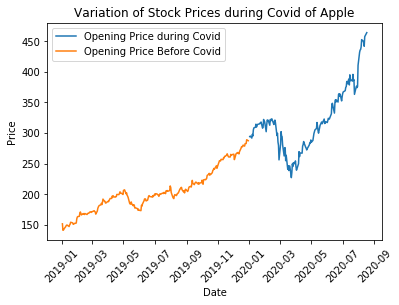

In [ ]:
share_price_Covid("AAPL")
share_price_PreCovid("AAPL")

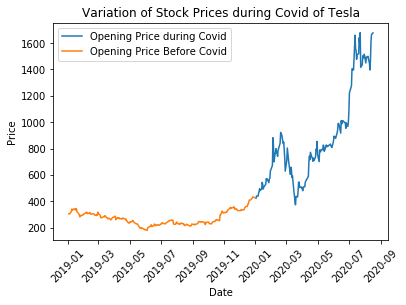

In [ ]:
share_price_Covid('TSLA')
share_price_PreCovid('TSLA')

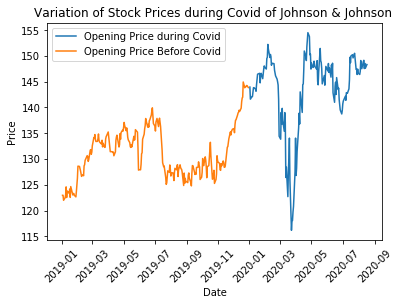

In [ ]:
share_price_Covid('JNJ')
share_price_PreCovid('JNJ')

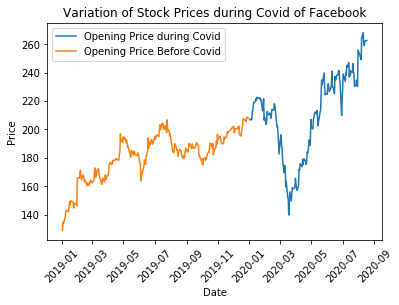

In [ ]:
share_price_Covid("FB")
share_price_PreCovid("FB")

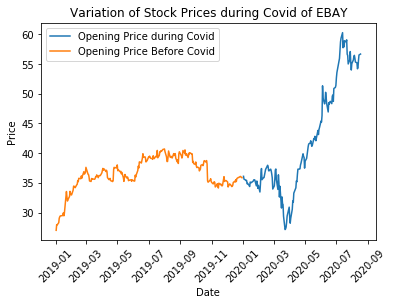

In [ ]:
share_price_Covid("EBAY")
share_price_PreCovid("EBAY")

##### <font color=red>Deductions:</font>
###### In March - April when Covid was at its peak the share prices of all companies fell drastically
###### All the companies except Johnson & Johnson had a "V" Shaped recovery following the crisis

##### <font color=red>Creating and downloading a CSV file of company information</font>

In [ ]:
def company_info(ticker_symbol):

    stock_name = yf.Ticker(ticker_symbol)
    keys = list(stock_name.info.keys())
    values = list(stock_name.info.values())
    df = pd.DataFrame(data=values,index=keys)
    comp_info  = df.transpose().rename(index={0:ticker_symbol})
    
    return comp_info

a =company_info('AAPL')
b =company_info('TSLA')
c =company_info('JNJ')
d =company_info('FB')
e =company_info('EBAY')
pd.concat([a,b,c,d,e]).to_csv('Company_info.csv')

##### <font color=red>Listing Top Institutional Stackeholders in each Company</font>

In [ ]:
def top_institutional_stakeholdrs(ticker_symbol):
    df1 = yf.Ticker(ticker_symbol).get_institutional_holders().head()
    df1.index = [1,2,3,4,5]
    print("Top Institutional Stackeholders in "+ dict[ticker_symbol])
    print(df1)

In [ ]:
top_institutional_stakeholdrs('AAPL')

Top Institutional Stackeholders in Apple
                       Holder     Shares Date Reported   % Out        Value
1  Vanguard Group, Inc. (The)  336728608    2020-03-30  0.0788  85626717728
2              Blackrock Inc.  274684501    2020-03-30  0.0642  69849521759
3     Berkshire Hathaway, Inc  245155566    2020-03-30  0.0573  62340608878
4    State Street Corporation  180558954    2020-03-30  0.0422  45914336412
5         Advisor Group, Inc.  116768396    2020-03-30  0.0273  29693035418


In [ ]:
top_institutional_stakeholdrs('TSLA')

Top Institutional Stackeholders in Tesla
                        Holder    Shares Date Reported   % Out        Value
1  Baillie Gifford and Company  11771213    2020-06-29  0.0632  12710673509
2      Capital World Investors  10714131    2020-03-30  0.0575   5614204644
3   Vanguard Group, Inc. (The)   8662781    2020-03-30  0.0465   4539297244
4               Blackrock Inc.   7213587    2020-03-30  0.0387   3779919588
5                     FMR, LLC   4709340    2020-06-29  0.0253   5085192425


In [ ]:
top_institutional_stakeholdrs('JNJ')

Top Institutional Stackeholders in Johnson & Johnson 
                                      Holder     Shares Date Reported   % Out  \
1                 Vanguard Group, Inc. (The)  233816138    2020-03-30  0.0888   
2                             Blackrock Inc.  192545915    2020-03-30  0.0731   
3                   State Street Corporation  151549024    2020-03-30  0.0576   
4              Geode Capital Management, LLC   39573737    2020-06-29  0.0150   
5  State Farm Mutual Automobile Insurance Co   34574792    2020-06-29  0.0131   

         Value  
1  30660310175  
2  25248545833  
3  19872623517  
4   5565254634  
5   4862252998  


In [ ]:
top_institutional_stakeholdrs('FB')

Top Institutional Stackeholders in Facebook
                          Holder     Shares Date Reported   % Out        Value
1     Vanguard Group, Inc. (The)  188139998    2020-06-29  0.0783  42720949345
2                 Blackrock Inc.  161273433    2020-06-29  0.0671  36620358431
3                       FMR, LLC  124032404    2020-06-29  0.0516  28164037976
4  Price (T.Rowe) Associates Inc  103460097    2020-06-29  0.0430  23492684225
5       State Street Corporation   96902907    2020-06-29  0.0403  22003743092


In [ ]:
top_institutional_stakeholdrs('EBAY')

Top Institutional Stackeholders in EBAY
                                    Holder    Shares Date Reported   % Out  \
1               Vanguard Group, Inc. (The)  61094315    2020-03-30  0.0873   
2                           Blackrock Inc.  50003536    2020-03-30  0.0714   
3                 State Street Corporation  35099047    2020-03-30  0.0502   
4  Comprehensive Financial Management, LLC  32933858    2020-06-29  0.0471   
5            Baupost Group, Inc,.(The) LLC  32086000    2020-06-29  0.0458   

        Value  
1  1836495108  
2  1503106292  
3  1055077352  
4  1727380852  
5  1682910700  


##### <font color=red>Deduction:</font>
###### Vanguard Group, Inc. is the biggest Institutional Stackeholder in 4 out 5 companies

##### <font color=red>Analysing Volatality of stocks in Covid and Pre Covid periods:</font>
###### More is the fluctuation between "High" and "Low" more volatile the stock is.

In [ ]:
def volatility_Covid(ticker_symbol):
    Opening_price_Covid = yf.Ticker(ticker_symbol).history("ytd")['High']
    closing_price_Covid = yf.Ticker(ticker_symbol).history("ytd")['Low']
    index_lst = yf.Ticker(ticker_symbol).history("ytd").index
    plt.plot(index_lst,Opening_price_Covid,label='High during Covid')
    plt.plot(index_lst,closing_price_Covid,label='Low Price during Covid')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Analysing Volatality in Covid and Pre Covid periods of '+dict[ticker_symbol])
    plt.legend()


In [ ]:
def volatility_PreCovid(ticker_symbol):
    Opening_price_PreCovid = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-12-31" )['High']
    Closing_price_PreCovid = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-12-31" )['Low']
    index_lst = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-12-31" ).index
    plt.plot(index_lst,Opening_price_PreCovid,label='High during Pre Covid')
    plt.plot(index_lst,Closing_price_PreCovid ,label='Low during Pre Covid')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Analysing Volatality in Covid and Pre Covid periods of '+dict[ticker_symbol])
    plt.legend()


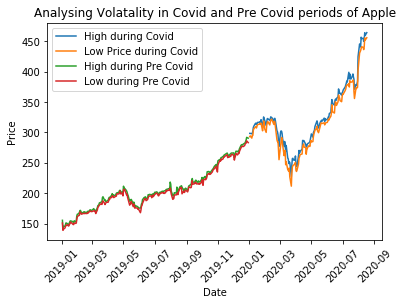

In [ ]:
volatility_Covid('AAPL')
volatility_PreCovid('AAPL')

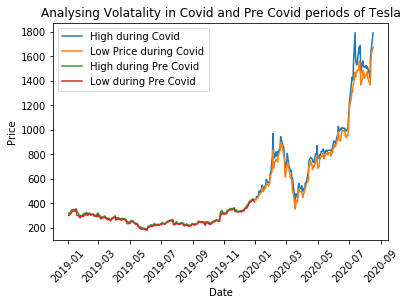

In [ ]:
volatility_Covid('TSLA')
volatility_PreCovid('TSLA')

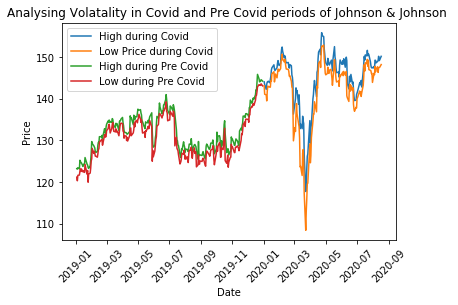

In [ ]:
volatility_Covid('JNJ')
volatility_PreCovid('JNJ')

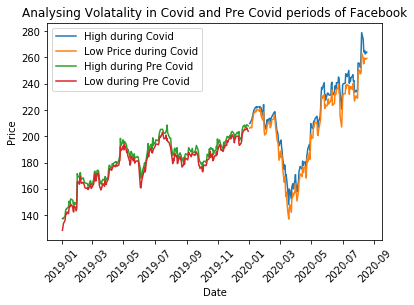

In [ ]:
volatility_Covid('FB')
volatility_PreCovid('FB')

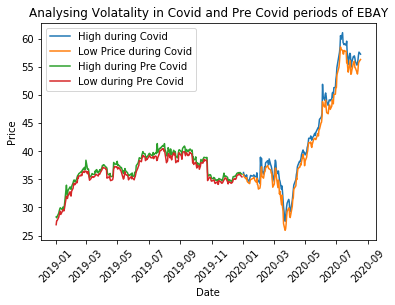

In [ ]:
volatility_Covid('EBAY')
volatility_PreCovid('EBAY')

##### <font color=red>Deductions:</font>
###### Stocks became more volatile during Covid as compared to Pre-Covid
###### Johnson & Johnson is the most volatile stock all of the companies

##### <font color=red>Analysing Quarterwise results in FY 2019:</font>

In [ ]:
def Quarter_1(ticker_symbol):
    Quater_1 = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-03-31" )['Open']
    index_lst = yf.Ticker(ticker_symbol).history(start = "2019-01-02", end ="2019-03-31").index
    plt.plot(index_lst, Quater_1,label="Quarter 1")
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Quarterly Results of FY 2019 of '+ dict[ticker_symbol])
    plt.legend()

In [ ]:
def Quarter_2(ticker_symbol):
    Quater_2 = yf.Ticker(ticker_symbol).history(start = "2019-04-01", end ="2019-06-30" )['Open']
    index_lst = yf.Ticker(ticker_symbol).history(start = "2019-04-01", end ="2019-06-30" ).index
    plt.plot(index_lst, Quater_2,label="Quarter 2")
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Quarterly Results of FY 2019 of '+ dict[ticker_symbol])
    plt.legend()

In [ ]:
def Quarter_3(ticker_symbol):
    Quater_3 = yf.Ticker(ticker_symbol).history(start = "2019-07-01", end ="2019-09-30" )['Open']
    index_lst = yf.Ticker(ticker_symbol).history(start = "2019-07-01", end ="2019-09-30" ).index
    plt.plot(index_lst,Quater_3,label="Quarter 3")
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Quarterly Results of FY 2019 of '+ dict[ticker_symbol])
    plt.legend()

In [ ]:
def Quarter_4(ticker_symbol):
    Quater_4 = yf.Ticker(ticker_symbol).history(start = "2019-10-01", end ="2019-12-31" )['Open']
    index_lst = yf.Ticker(ticker_symbol).history(start = "2019-10-01", end ="2019-12-31" ).index
    plt.plot(index_lst, Quater_4,label="Quarter 4")
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Quarterly Results of FY 2019 of '+ dict[ticker_symbol])
    plt.legend()

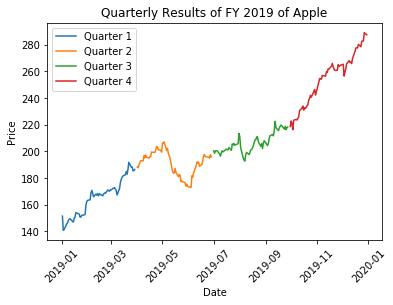

In [ ]:
Quarter_1("AAPL")
Quarter_2("AAPL")
Quarter_3("AAPL")
Quarter_4("AAPL")

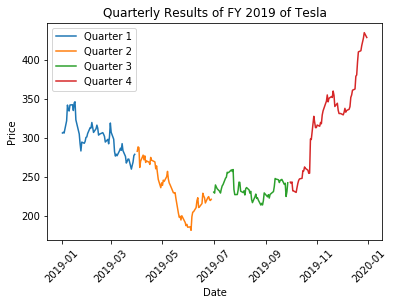

In [ ]:
Quarter_1("TSLA")
Quarter_2("TSLA")
Quarter_3("TSLA")
Quarter_4("TSLA")

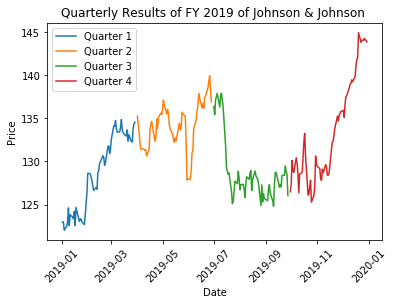

In [ ]:
Quarter_1("JNJ")
Quarter_2("JNJ")
Quarter_3("JNJ")
Quarter_4("JNJ")

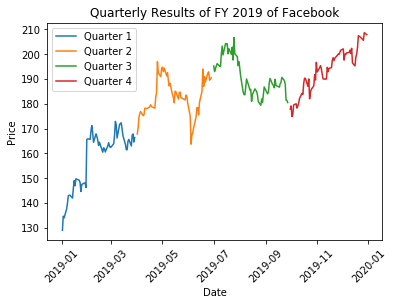

In [ ]:
Quarter_1("FB")
Quarter_2("FB")
Quarter_3("FB")
Quarter_4("FB")

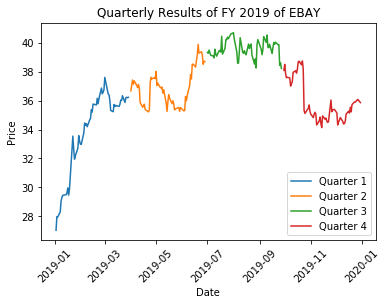

In [ ]:
Quarter_1("EBAY")
Quarter_2("EBAY")
Quarter_3("EBAY")
Quarter_4("EBAY")

##### <font color=red>Deductions:</font>
###### Q2 was bad for all the companies.
###### Q4 was the best quarter for all the companies except EBAY

##### <font color=red>Final Summary:</font>
###### 1) During March - April of 2020 the stock prices of companies were very low but most the companies had a V-shaped recovery after that. It won't be wrong to conclude that Covid affected businesses in a negative way across all the sectors.
###### 2) Stocks of all companies became more volatile during Covid period
###### 3) In 2019 Q2 was bad for all companies and Q4 was the best for most.
###### 4) Vanguard Group, Inc. is the largest Institutional Stackeholder in most of the companies